In [1]:
(require '[whittemore.core
           :refer [define model identify q identifiable?
                   latent-projection vertices]]
         '[whittemore.random :as ar]
         '[clojure.repl :refer [doc]]
         '[incanter.charts]
         :reload-all)

In [2]:
(def N 1000)

(def num-vars
    "Number of variables per model."
    15)

(def num-latent
    "Number of non-observable variables per model."
    10)

(def v
    "Variables of the models"
    (ar/gen-nodes num-vars))

v

[:n_1 :n_2 :n_3 :n_4 :n_5 :n_6 :n_7 :n_8 :n_9 :n_10 :n_11 :n_12 :n_13 :n_14 :n_15]

In [3]:
(defn gen-markovian
    [num-models num-vars p-edge]
    (take num-models
          (repeatedly #(ar/erdos-renyi-model num-vars p-edge))))

#'user/gen-markovian

In [4]:
(defn gen-models
    [num-models num-vars num-latent p-edge]
    (let [models (gen-markovian num-models num-vars p-edge)]
        (for [m models]
            (latent-projection m (take num-latent (shuffle (vertices m)))))))

#'user/gen-models

In [5]:
(defn erdos-reyni-number [num-vars]
    (/ (java.lang.Math/log num-vars) num-vars))

#'user/erdos-reyni-number

In [6]:
(defn average [coll]
    (/ (reduce + coll) (count coll)))

#'user/average

In [7]:
(erdos-reyni-number 10)

0.23025850929940458

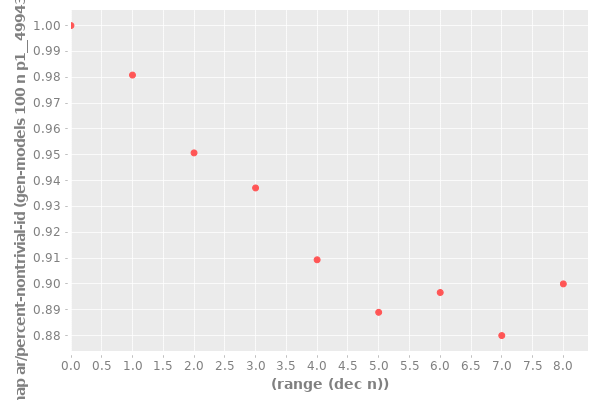

In [8]:
(let [n 10]
  (->
    (incanter.charts/scatter-plot
        (range (dec n))
        (map #(average (map ar/percent-nontrivial-id
                            (gen-models 100 n % 0.5)))
             (range (dec n))))
    
    (.createBufferedImage 600 400)))

In [9]:
(defn all-singleton-queries
    "All queries of the form (q i :do j) for i not= j"
    [nodes]
    (for [i nodes
          j nodes
          :when (not= i j)]
          (q [i] :do [j])))

#'user/all-singleton-queries

In [10]:
(defn nontrivial-singleton-queries
    [nodes]
    (for [i nodes
          j nodes
          :when (< (compare i j) 0)]
          (q [i] :do [j])))

#'user/nontrivial-singleton-queries

In [11]:
(defn percent-identifiable
    [m]
    (let [queries (all-singleton-queries (vertices m))]
        (/
            (->>
                queries
                (map #(identifiable? m %))
                (filter identity)
                count)
            (count queries))))

#'user/percent-identifiable

In [12]:
(defn percent-id-nontrivial
    [m]
    (let [queries (nontrivial-singleton-queries (vertices m))]
        (/
            (->>
                queries
                (map #(identifiable? m %))
                (filter identity)
                count)
            (count queries))))

#'user/percent-id-nontrivial